<a href="https://colab.research.google.com/github/nadavo11/K_means_cluster/blob/master/Copy_of_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

GMM implementation: 
The Gaussian Mixture Model is a statistical model that assumes that the observations follow a normal distribution, ie $f(x|z)$ is a Gaussian distribution with expectation $µ_Z$ and covariance matrix $Σ_Z$. The random variable $Z$
is a hidden variable.


in this example, we are given two gaussians:
$µ_1 = \begin{bmatrix}
-1 \\
-1 
\end{bmatrix}$
$µ_2 = \begin{bmatrix}
1 \\
1 
\end{bmatrix}$

$\Sigma_1 = \begin{bmatrix}
0.8 & 0 \\
0 & 0.8
\end{bmatrix}$

$\Sigma_2 = \begin{bmatrix}
0.75 & -0.2 \\
-0.2 & 0.6
\end{bmatrix}$

we are given the probability for the first label:

$P_Z(1) = 0.7$

Let us define the datapiont generator:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N = 150
# first Gussian
mean_1 = [-1, -1]
cov_1 = [[0.75, -0.2], [-0.2, 0.6]]

# second Gussian
mean_2 = [1, 1]
cov_2 = [[0.8, 0], [0, 0.8]]


def generate_normal_datapoint(guaussian_dist):
    mean = guaussian_dist[0]
    cov = guaussian_dist[1]
    dp = np.random.multivariate_normal(mean, cov,  check_valid='warn', tol=1e-8)
    dp = [dp[0],dp[1]]
    return dp

now we will make a dataset

In [ ]:
colors = []
data = []
for i in range(N):
    z = np.random.binomial(1, 0.7)
    d = {1: (mean_1, cov_1), 2: (mean_2, cov_2)}
    data.append(generate_normal_datapoint(d[z+1]))
    colors.append(np.random.uniform(0,1)/4+3*z/4)
    

now, lets plot the data (revealing the source of each data point) 

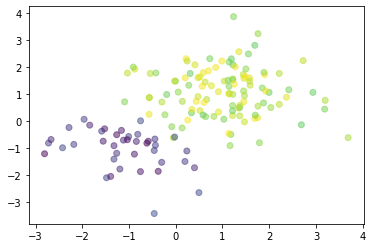

In [ ]:
data = np.array(data)

#colors = np.random.rand(N)
plt.scatter(data[:,0], data[:, 1], c=colors, alpha=0.5)
plt.show()

K Means Algorithm

pseudo code: The k means algorithm goes as follows

1. randomly select k data points as centroids
2. repeat until the centroids converge:
    3. calculate the distance between each data point and each centroid
    4. assign each data point to the cluster with the nearest centroid
    5. recalculate the centroid of each cluster

in our case, K will obviously equal 2 (we know for a fact what distribution is behind the sceans)
this is what the implementation looks like:

In [ ]:
def K_means_cluster(k, data):
    # 1. randomly select k data points as
    #    centroids
    centroids = []
    for i in range(k):
        mean = np.random.uniform(-3,3,size=2)
        centroids.append(mean)

    dif = 1
    tol= 0.01
    # 3. repeat until the centroids converge:
    while (i <= 10) and dif > tol: #TODO: add condition
        previous_centroids = np.array(centroids)

        # 2. calculate the distance between
        #    each data point and each centroid
        d = []
        for dp in data:
            distance = [np.linalg.norm(dp - ci) for ci in centroids]
            d.append(distance)
        d = np.array(d)


        # 4. assign each data point to the cluster with the nearest centroid
        clusters = [[], []]
        for i, dp in enumerate(d):
            closest_centroid = np.argmin(dp)
            clusters[closest_centroid].append(list(data[i]))

        fig = plt.figure()
        ax1 = fig.add_subplot()
        colors = ['r','b','g','y']
        for n in range(k):
            x = [row[0] for row in clusters[n]]
            y = [row[1] for row in clusters[n]]
            ax1.scatter( x, y , c=colors[n%4],alpha=0.3, label='first')

        ax1.scatter([row[0] for row in np.array(centroids)], [row[1] for row in np.array(centroids)], c='m',marker="x",label='centroids')


        plt.legend(loc='upper left');
        plt.show()

        # 5. recalculate the centroid of each cluster
        for i, c in enumerate(clusters):
            centroids[i] = np.mean(c,axis=0)

        dif = np.linalg.norm(centroids-np.array(previous_centroids))
        print("dif", dif)



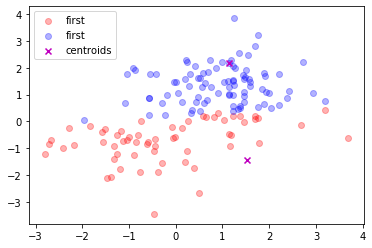

dif 2.062687360318424


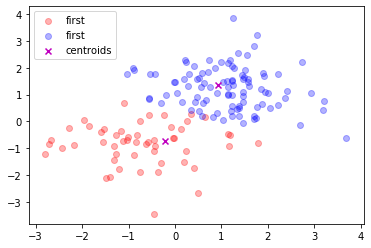

dif 0.5714873506016497


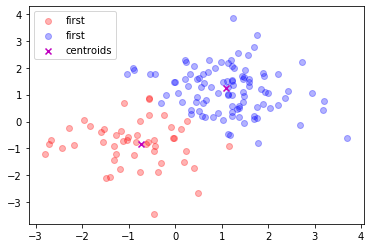

dif 0.18422144933312726


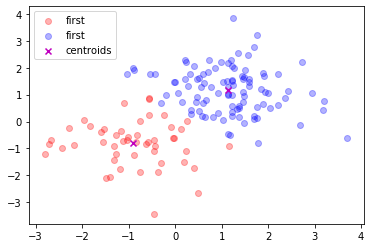

dif 0.0


In [ ]:
K_means_cluster(2, data)


notice how the centroids converge, one around $µ_1 = \begin{bmatrix}
-1 \\
-1 
\end{bmatrix}$ and the other on
$µ_2 = \begin{bmatrix}
1 \\
1 
\end{bmatrix}$
which are the exact original means!


we will try to reproduce the resaults on different initilizations:


In [ ]:

def getdata():
    colors = []
    data = []
    for i in range(N):
        z = np.random.binomial(1, 0.7)
        d = {1: (mean_1, cov_1), 2: (mean_2, cov_2)}
        data.append(generate_normal_datapoint(d[z+1]))
        colors.append(np.random.uniform(0,1)/4+3*z/4)
        
    data = np.array(data)

    #colors = np.random.rand(N)
    plt.scatter(data[:,0], data[:, 1], c=colors, alpha=0.5)
    plt.show()
    return data

_______________________________________________________

              initialization no.  0 

___________________________________________________





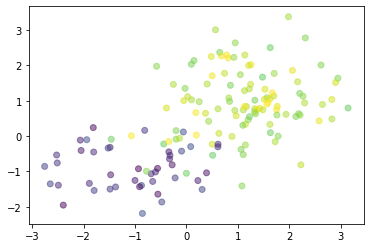

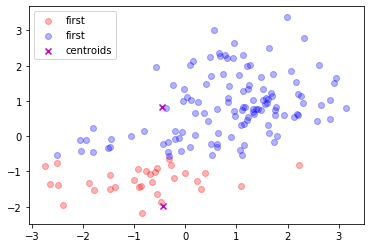

dif 1.5472924325567192


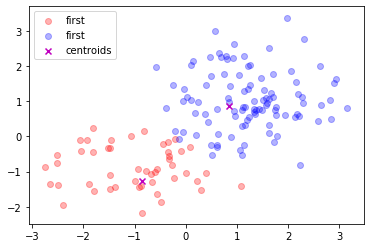

dif 0.5752956148444314


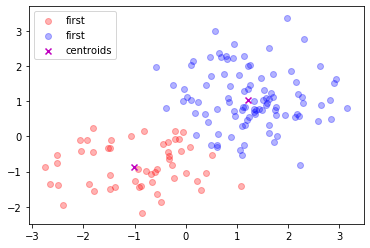

dif 0.12097603599998287


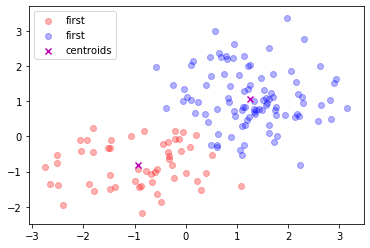

dif 0.03079080300913419


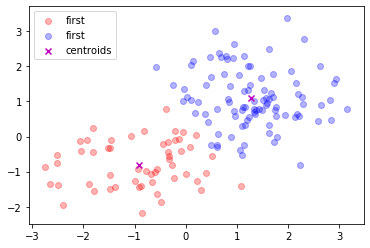

dif 0.03577381664238008


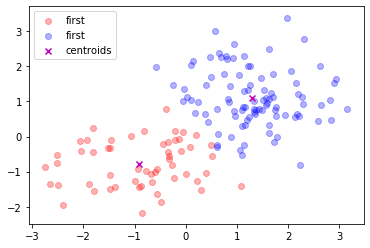

dif 0.031847066684017926


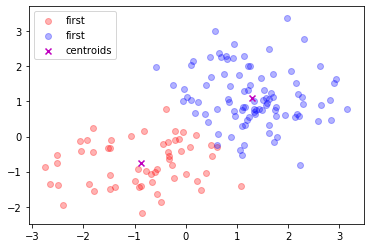

dif 0.03248377747909597


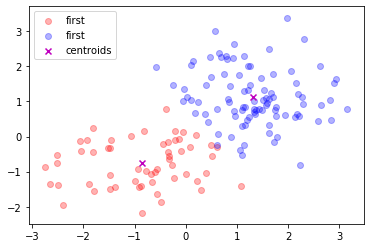

dif 0.0
_______________________________________________________

              initialization no.  1 

___________________________________________________





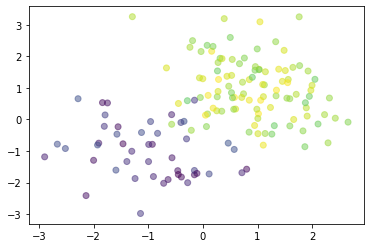

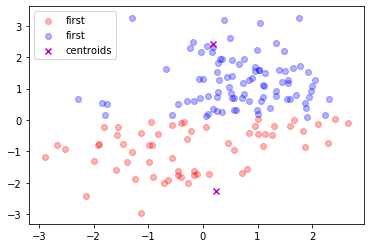

dif 1.950487666417969


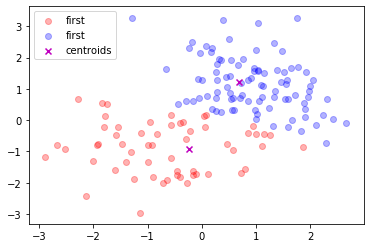

dif 0.5145411549711586


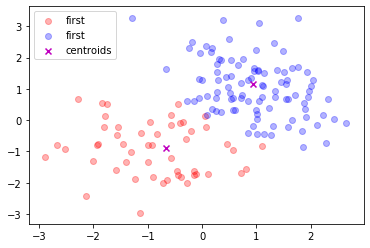

dif 0.24988535583098068


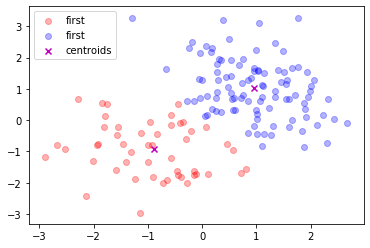

dif 0.06944202924554432


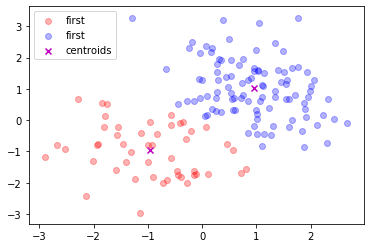

dif 0.034734546301125956


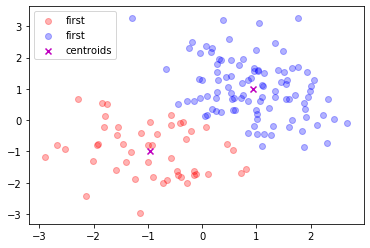

dif 0.0
_______________________________________________________

              initialization no.  2 

___________________________________________________





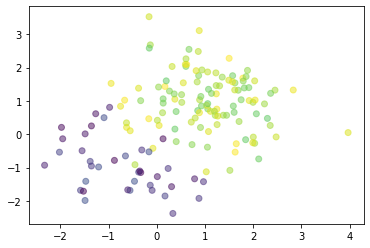

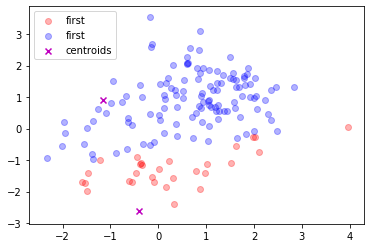

dif 2.3621335874658134


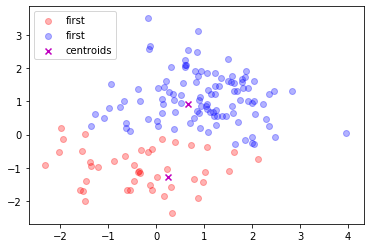

dif 0.7272869729858549


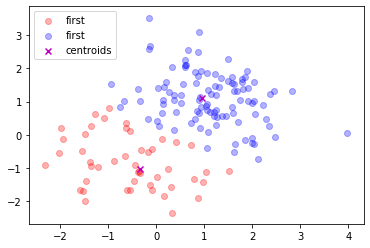

dif 0.315785348189393


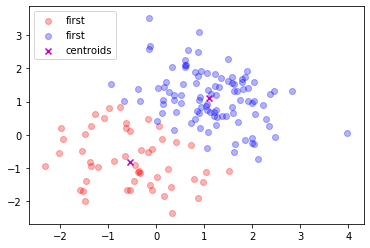

dif 0.09474071280991017


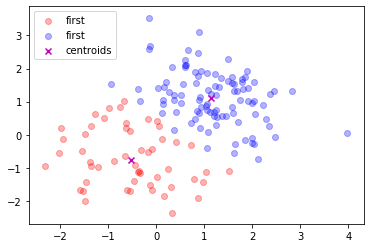

dif 0.0653289574527272


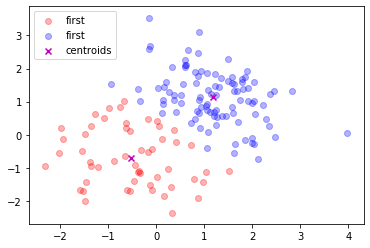

dif 0.02681777581788612


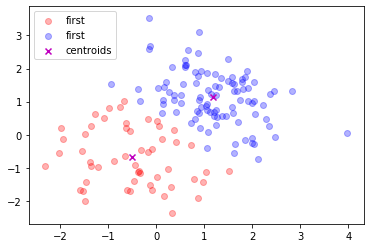

dif 0.0


In [ ]:
for i in range(3):
    print("_______________________________________________________\n\n              initialization no. ", i,"\n\n___________________________________________________\n\n\n")
    d = getdata()
    K_means_cluster(2, d)



as expected, the centroids converge to the original means despite being randomly assigned.

In [ ]:
!export PATH=/Library/TeX/texbin:$PATH


'export' is not recognized as an internal or external command,
operable program or batch file.
